# Assignment 1 - DAX ESG dataset

## This notebook
This notebook is boiler plate code that can be re-used for loading the data.

## Interesting resources
- Source of the "actions" dataset: [Bridging the Gap in ESG Measurement: Using NLP to Quantify Environmental, Social, and Governance Communication](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4622514)
- Source of the target "DAX ESG" dataset: [Detecting greenwashing signals through a comparison of ESG reports and public media](https://www.swisstext.org/wp-content/uploads/2023/09/Greenwashing.pdf )
- Example sentiment analysis on DAX ESG dataset https://colab.research.google.com/drive/1TrBuB3BbI5oOskD4ht7aHaAYyporTR7n?usp=sharing
- https://www.kaggle.com/datasets/equintel/dax-esg-media-dataset?resource=download

In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("DATA/esg_documents_for_dax_companies_with_scores_all.pkl")
df

,company,content,datatype,date,domain,esg_topics,internal,symbol,title,url,mean_action_score,n_chunks,n_estimated_actions
0,Beiersdorf AG,Sustainability Highlight Report CARE BEYOND SK...,sustainability_report,2021-03-31,NaN,"['CleanWater', 'GHGEmission', 'ProductLiabilit...",1,BEI,BeiersdorfAG Sustainability Report 2021,NaN,0.883412,25.0,22.0
1,Deutsche Telekom AG,Corporate Responsibility Report 2021 2 Content...,sustainability_report,2021-03-31,NaN,"['DataSecurity', 'Iso50001', 'GlobalWarming', ...",1,DTE,DeutscheTelekomAG Sustainability Report 2021,NaN,0.663768,263.0,173.0
2,Vonovia SE,VONOVIA SE SUSTAINABILITY REPORT 2021 =For a S...,sustainability_report,2021-03-31,NaN,"['Whistleblowing', 'DataSecurity', 'Vaccine', ...",1,VNA,VonoviaSE Sustainability Report 2021,NaN,0.429047,193.0,79.0
3,Merck KGaA,Sustainability Report 2021 TABLE OF CONTENTS S...,sustainability_report,2021-03-31,NaN,"['DataSecurity', 'DataMisuse', 'DrugResistance...",1,MRK,MerckKGaA Sustainability Report 2021,NaN,0.679299,210.0,142.0
4,MTU,Our ideas and concepts FOR A SUSTAINABLE FUTUR...,sustainability_report,2020-03-31,NaN,"['WorkLifeBalance', 'Corruption', 'AirQuality'...",1,MTX,MTUAeroEngines Sustainability Report 2020,NaN,0.682892,102.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,Zalando SE,"To reset your pass, please enter your email be...",tech,2021-07-12,pocketgamer,"['CustomerService', 'Meat', 'HumanCapital', 'T...",0,ZAL,Pocket Gamer Connects Digital # 7,https://www.pocketgamer.biz/events/1636/pocket...,0.595652,13.0,8.0
11544,Zalando SE,Lo esencial: Materias primas: correlaciones e...,business,2022-07-05,marketscreener,['WasteManagement'],0,ZAL,"Índices: ni Value ni Growth, ¡defensivos!",https://es.marketscreener.com/noticias/ultimas...,0.000032,3.0,0.0
11545,Zalando SE,A look at the evolution of the fashion industr...,thinktank,2021-05-11,cbinsights,"['CustomerService', 'Recruiting', 'Sustainable...",0,ZAL,The Future of Fashion: Technology & the Industry,https://www.cbinsights.com/research/fashion-te...,0.996982,32.0,32.0
11546,Zalando SE,"By clicking submit, you agree to share your em...",tech,2022-05-23,techfundingnews,"['ClimateTech', 'Cybersecurity', 'CorporateCul...",0,ZAL,These are the top 10 EMEA VCs of 2022 — TFN,https://techfundingnews.com/these-are-the-top-...,0.470160,6.0,2.0


# 0. Cleaning the words from the content column

C:\Users\User\AppData\Local\Temp\ipykernel_7900\2840759299.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["size_char"] = df_1["content"].apply(lambda x: len(x))


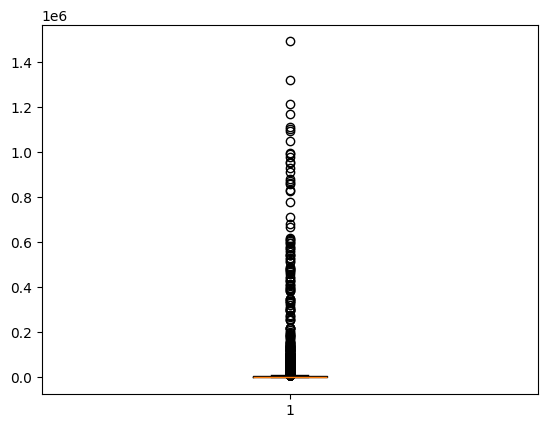

[   67.  1412.  2138.  2687.  3232.  3865.  4619.  5569.  7177. 10323.]
Deciles of internal documents length [ 28749. 117981. 217730. 323361. 387622. 461123. 530884. 606460. 859091.
 992910.]
We will truncate 0.37% of the documents to 500k characters
It represents 42.86% of the internal documents


100%|██████████| 11531/11531 [00:00<00:00, 177885.94it/s]
C:\Users\User\AppData\Local\Temp\ipykernel_7900\2840759299.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["content"] = df_1["content"].progress_apply(lambda x: x[:500000] if len(x) > 500000 else x)


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Focus on the rows with a score and content
df_1 = df[np.logical_and(
    np.logical_not(df['n_chunks'].isnull()),
    np.logical_not(df['content'].isnull())
)]

# Add a column with the number of characters to truncate overly long documents
df_1["size_char"] = df_1["content"].apply(lambda x: len(x))
plt.boxplot(df_1["size_char"]) # huge right tail
plt.show()

deciles = np.percentile(df_1["size_char"], np.arange(0, 100, 10))
print(deciles) # 90% of documents fall under 10k characters
deciles_int = np.percentile(df_1[df_1["internal"]==1]["size_char"], np.arange(0, 100, 10))
print("Deciles of internal documents length",deciles_int) # However internal documents are much longer
print(f"We will truncate {len(df_1[df_1['size_char'] > 500000])/len(df_1):.2%} of the documents to 500k characters")
print(f"It represents {len(df_1[np.logical_and(df_1['size_char'] > 500000, df_1['internal']==1)])/len(df_1[df_1['internal']==1]):.2%} of the internal documents")

# Truncate documents to 500k characters
df_1["content"] = df_1["content"].progress_apply(lambda x: x[:500000] if len(x) > 500000 else x)

We have the chance to have annotated data, we can therefore already check which companies are the most common to be engaged in greenwashing. In this case, we can define them as the company where the difference between what they say and what external sources say they do is the biggest.

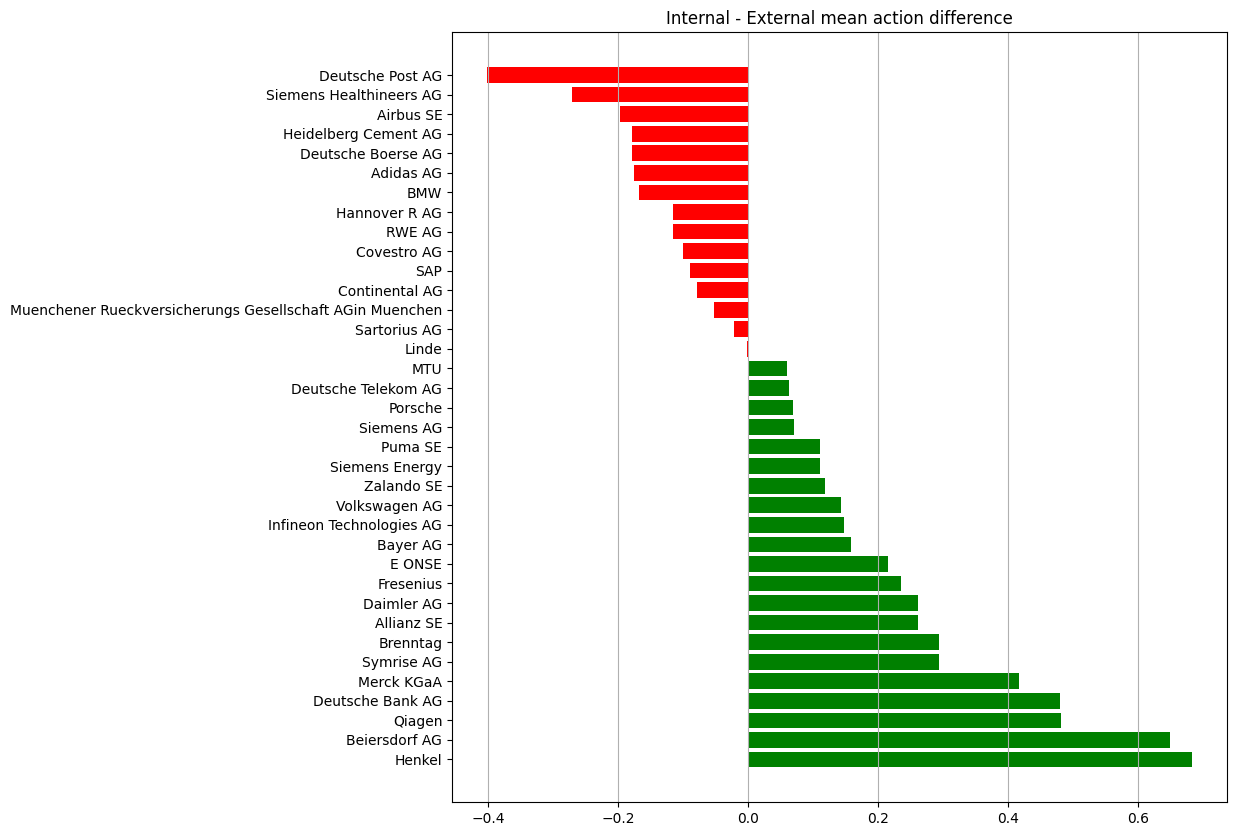

In [58]:
agg_table = df_1.groupby(["company","internal"]).agg({
    'mean_action_score': ['mean', 'min', 'max'], 'company': ["count"]
}).reset_index()

agg_table.columns = ["company","internal","mean_action_score_mean","mean_action_score_min","mean_action_score_max","count"]
agg_table

diff_table = agg_table[agg_table["internal"] == False].merge(
    agg_table[agg_table["internal"] == True],
    on="company",
    suffixes=("_external","_internal")
)

diff_table["mean_difference"] = diff_table["mean_action_score_mean_internal"] - diff_table["mean_action_score_mean_external"]
diff_table.sort_values("mean_difference", ascending=False, inplace=True)

plt.figure(figsize=(10,10))
plt.barh(
    diff_table["company"], diff_table["mean_difference"],
    color=np.where(diff_table["mean_difference"] > 0, "green", "red"))
plt.title("Internal - External mean action difference")
plt.grid(axis="x")
plt.show()


In [59]:
from collections import Counter
import tqdm
tqdm.tqdm.pandas()
import spacy
import string
import matplotlib.pyplot as plt

In [33]:
nlp = spacy.load("en_core_web_md")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation


c:\Users\User\Documents\VLERICK\NLP\vlerick-mai-nlp-2023\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
# We made sure that no text was over 500k characters so no try except needed to catch the exception
def spacy_tokenizer(sentence):
    """Transforms a sentence into a list of lemma tokens and remove stop words and punctuation.

    Parameters
    ----------
    sentence : str
        Input sentence.

    Returns
    -------
    list
        List of lemma tokens.
    """
    mytokens = nlp(sentence.lower())
    mytokens = [word for word in mytokens if not word.is_oov and not word.is_stop and not word.is_punct]
    mytokens = [word.lemma_.strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]
    return mytokens

In [63]:
df_test = df_1.copy()
df_test = df_test.iloc[:10,:] # small dataset to test code on CPU

def tokenize_text(data, from_column, to_column):
    """Tokenize a column of text and add the result to a new column."""
    df_test[to_column] = df_test[from_column].progress_apply(spacy_tokenizer)    

tokenize_text(df_test, "content", "tokens")
print("The tokenisation of the first document reduces the number of characters (words -> lemma) from",
    len(df_test["content"][0]), "to", len(" ".join(df_test["tokens"][0]))) # Success

# Tokenize all documents and save the result in a new pickle file

# tokenize_text(df_1, "content", "tokens")
# df_1.to_pickle("/content/drive/MyDrive/Vlerick - NLP Course/esg_documents_for_dax_companies_with_scores_tokenized.pkl")

100%|██████████| 10/10 [03:18<00:00, 19.84s/it]

The tokenisation of the first document reduces the number of words from 56786 to 37412


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 342/342 [02:08<00:00,  2.66it/s]


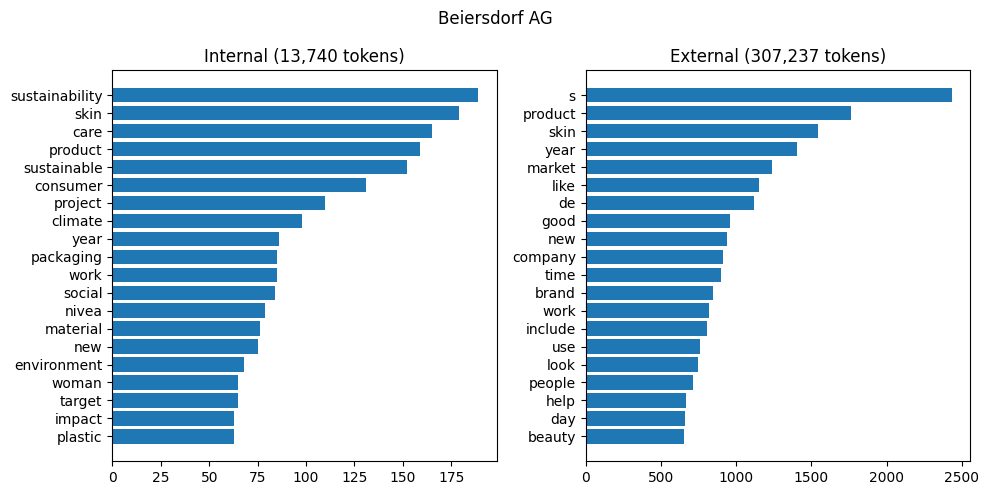

In [136]:
from collections import Counter
import tqdm
tqdm.tqdm.pandas()

def countWordFrequencies(example, counter):
    tokens = spacy_tokenizer(example)
    counter.update(tokens)

def frequency_df(df):
    counter = Counter()
    df['content'].progress_apply(lambda x: countWordFrequencies(x, counter))
    freq_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    freq_df = freq_df.rename(columns={'index':'word', 0:'count'})
    freq_df = freq_df.sort_values(by='count', ascending=False)
    return freq_df

def compare_frequencies(df, company, save=False, top=20, directory='DATA/figures/'):
    df_1 = df[df['company'] == company]
    count_int = frequency_df(df_1[df_1['internal'] == 1])
    count_ext = frequency_df(df_1[df_1['internal'] == 0])
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
    ax1.barh(count_int['word'][:top][::-1], count_int['count'][:top][::-1])
    ax1.set_title('Internal ({:,.0f} tokens)'.format(count_int['count'].sum()))
    ax2.barh(count_ext['word'][:top][::-1], count_ext['count'][:top][::-1])
    ax2.set_title('External ({:,.0f} tokens)'.format(count_ext['count'].sum()))
    plt.suptitle(company)
    plt.tight_layout()
    if save:
        plt.savefig('{}{}_word_frequencies.png'.format(directory,company))
    plt.show()

compare_frequencies(df_1, 'Beiersdorf AG', save=True)

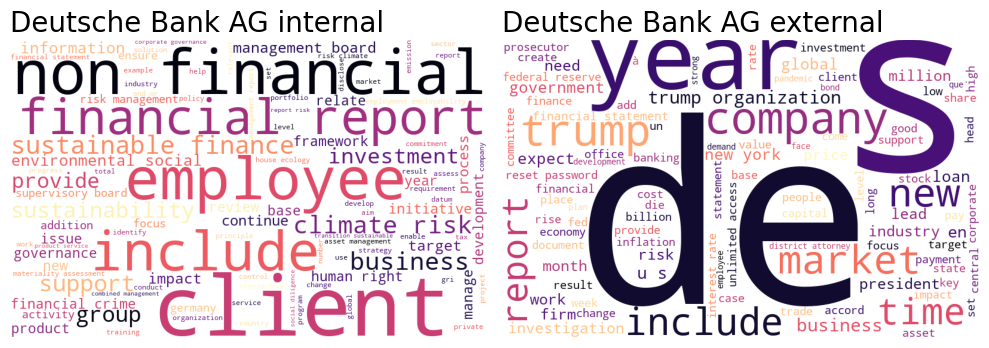

In [137]:
# inspired from https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b

import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def add_wordcloud(text, company, ax, internal = True, random_state=42):
    wc = WordCloud(background_color='white', colormap = 'magma', max_words=100,
        stopwords = spacy_tokenizer(company), height = 500, width = 800, random_state=random_state
        ).generate(" ".join(spacy_tokenizer(text)))
    ax.axis("off")
    ax.imshow(wc)
    ax.set_title(
        f'{company} {"internal" if internal else "external"}',
        color='black',fontsize=20,loc='left')

def compare_wordclouds(data, company, save=False, random_state=42, directory='DATA/figures/'):
    df2 = data[data['company'] == company]
    df2int = df2[df2['internal'] == 1]
    df2ext = df2[df2['internal'] == 0]

    text_int = " ".join(df2int['content'].tolist())
    text_ext = " ".join(df2ext['content'].tolist())

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
    try:
        add_wordcloud(text_int, company, ax1, random_state=random_state)
    except:
        add_wordcloud(text_int[:900000], company, ax1, random_state=random_state)
    try:
        add_wordcloud(text_ext, company, ax2, internal = False, random_state=random_state)
    except:
        add_wordcloud(text_ext[:900000], company, ax2, internal = False, random_state=random_state)
    plt.tight_layout()
    if save:
        plt.savefig(f'{directory}wordcloud_{company}.png')
    plt.show()

compare_wordclouds(df_1, 'Deutsche Bank AG', save=True)
# https://www.forbes.com/sites/danalexander/2023/10/16/how-trump-fooled-deutsche-bank/
# >> Trump issue

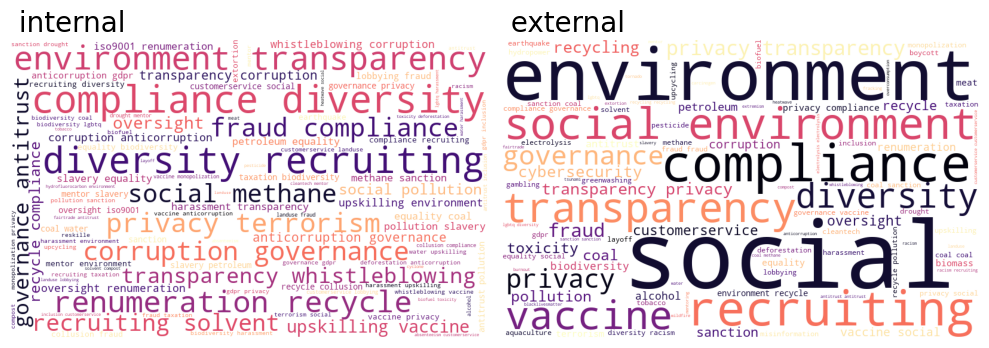

In [156]:
df2 = df_1
df2int = df2[df2['internal'] == 1]
df2ext = df2[df2['internal'] == 0]

text_int = " ".join(df2int['esg_topics'].tolist())
text_ext = " ".join(df2ext['esg_topics'].tolist())

company=""
random_state=42
save=True
directory='DATA/figures/'

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 5))
try:
    add_wordcloud(text_int, company, ax1, random_state=random_state)
except:
    add_wordcloud(text_int[:900000], company, ax1, random_state=random_state)
try:
    add_wordcloud(text_ext, company, ax2, internal = False, random_state=random_state)
except:
    add_wordcloud(text_ext[:900000], company, ax2, internal = False, random_state=random_state)
plt.tight_layout()
if save:
    plt.savefig(f'{directory}wordcloud_esg_topics.png')
plt.show()

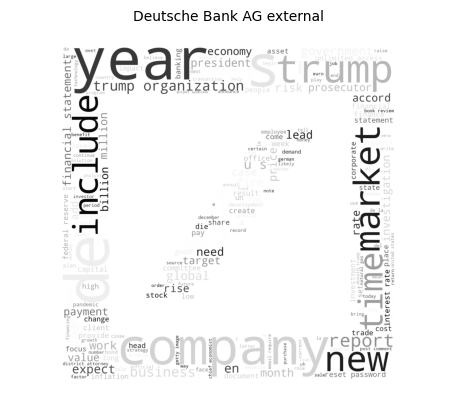

In [146]:
# DB_mask = np.array(Image.open("DATA/DB_logo.jpg"))

# wc = WordCloud(
#     background_color = 'white', mask = DB_mask, contour_width = 2, stopwords = spacy_tokenizer('Deutsche Bank AG'),
#     contour_color = 'white', colormap = 'Greys', width = 800, height = 500).generate(
#         " ".join(spacy_tokenizer(" ".join(df_1[np.logical_and(
#             df_1['company'] == 'Deutsche Bank AG',
#             df_1['internal'] == 0
#     )]['content'].to_list())[:900000])))
# plt.axis("off")
# plt.title('Deutsche Bank AG external', color='black',fontsize=10,loc='center')
# plt.imshow(wc)
# plt.savefig('DATA/figures/wordcloud_beautiful_external.png')
# plt.show()

In [3]:
from datasets import load_dataset

dataset = load_dataset("Emanuse/greenwashing_2")

c:\Users\User\Documents\VLERICK\NLP\vlerick-mai-nlp-2023\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 513 examples [00:00, 4331.09 examples/s]


In [11]:
gw_example = pd.DataFrame(dataset["train"])